In [1]:
import os
import pandas as pd
import numpy as np
import random
from pandas import DataFrame
from datetime import datetime

#from tensorflow.keras.optimizers import Adam

workdir = "path"

In [2]:
# < Important note > [ Please download input data from https://mega.nz/#F!CeYGDKyS!uqkmWJ4E2XSGJp_C2VO2gg]
# IC50evaluation//Dataset//Scenario6_MDC-9K_minmax

dataset = np.load(workdir + "//MDC9k_190510_ccle_cell_gdsc_mut_drug_info.npz") # input file
ss0 = np.load(workdir + '//MDC9k_190510_ccle_cell_gdsc_mut_drug_info_r0_9_1.npz') # split for training and test

In [3]:
x = dataset['x']
y = dataset['y']
# y_linear = dataset['y_lnIC50']
ss0_train = ss0['train']
ss0_test = ss0['test']

In [4]:
training_image_array, training_label_array = x[ss0_train], y[ss0_train]
test_image_array, test_label_array = x[ss0_test], y[ss0_test]

# # In[9]:
# ori = training_image_array
# bat = np.zeros((ori.shape[0],178))
# cat = np.hstack([ori,bat])
# training_image_array = cat

# # In[8]:
# training_image_array.shape

# # In[10]:
# ori2 = test_image_array
# bat2 = np.zeros((ori2.shape[0],178))
# cat2 = np.hstack([ori2,bat2])
# test_image_array = cat2


In [5]:
# In[15]:
ab =[]
for i in range(100,200):
    ab.append(len(training_image_array) % i)
    
print(min(ab), ab.index(min(ab)))

1 2


In [6]:
x.shape

(8727, 23538)

In [7]:
training_image_array.shape

(7855, 23538)

In [8]:
train_X, train_y, test_X, test_y = training_image_array, training_label_array, test_image_array, test_label_array

# if K.image_data_format() == 'channels_first':
#     train_X = train_X.reshape(train_X.shape[0], 1, img_rows, img_cols)
#     test_X = test_X.reshape(x_test.shape[0], 1, img_rows, img_cols)
#     input_shape = (1, img_rows, img_cols)
# else:
#     train_X = train_X.reshape(train_X.shape[0], img_rows, img_cols, 1)
#     test_X = test_X.reshape(test_X.shape[0], img_rows, img_cols, 1)
#     input_shape = (img_rows, img_cols, 1)


In [9]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(7855, 23538) (7855,) (872, 23538) (872,)


In [10]:
train_X = np.nan_to_num(train_X)
test_X = np.nan_to_num(test_X)

In [11]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
# train_X /= 255
# test_X /= 255
print('train_X shape:', train_X.shape)
print(train_X.shape[0], 'train samples')
print(test_X.shape[0], 'test samples')

train_X shape: (7855, 23538)
7855 train samples
872 test samples


In [12]:
# https://towardsdatascience.com/how-to-perform-ridge-and-ridge-regression-in-python-3b3b75541ad8
# https://brunch.co.kr/@itschloe1/11
StartTime8 = datetime.now()
print("StartTime :", StartTime8)
from sklearn.model_selection import GridSearchCV
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(random_state = 42)
# Train the model on training data
rf.fit(train_X, training_label_array)
EndTime8 = datetime.now()
print("EndTime :", EndTime8)

StartTime : 2020-02-12 12:13:52.975510
EndTime : 2020-02-12 14:31:39.971070


In [13]:
import matplotlib
from matplotlib import pyplot as plt

In [14]:
predicted_classes = rf.predict(test_X)

In [15]:
predicted_value = predicted_classes

In [17]:
import pickle
from sklearn.externals import joblib
workdir = "D://DrugResponsivenessGuideline_log//Result//MDC-9K//RF"
joblib.dump(rf, workdir + '//MDC_9K_minmax_RF_model.pkl') 


['D://DrugResponsivenessGuideline_log//Result//MDC-9K//RF//MDC_9K_minmax_RF_model.pkl']

In [18]:
a = pd.DataFrame(predicted_value)
b = pd.DataFrame(test_label_array)
c = pd.concat([a,b], axis=1)
c.columns=["Predicted","Test"]

In [19]:
workdir = "E://Ronny_TF//Ronny_IC50_RMSE//method_comparison//190517_randomforest_w_ccle_gdsc_mut_drug"
c.to_csv(workdir + '//190517_randomforest_w_ccle_gdsc_mut_drug_result.csv')


In [19]:
c

,Predicted,Test
0,1.589336,0.941970
1,2.026481,0.225864
2,1.572943,1.677600
3,-4.229077,-4.869996
4,-1.601880,-0.246987
...,...,...
867,1.816784,0.570138
868,2.063543,2.079442
869,1.717906,2.079442
870,1.879467,2.079442


In [20]:
predicted_value.shape

(872,)

In [21]:
from scipy.stats import linregress
linregress(b[0], a[0])

LinregressResult(slope=0.7840519556958553, intercept=-0.08551800808733984, rvalue=0.8191699282750604, pvalue=2.9925696945561943e-212, stderr=0.018611577135679836)

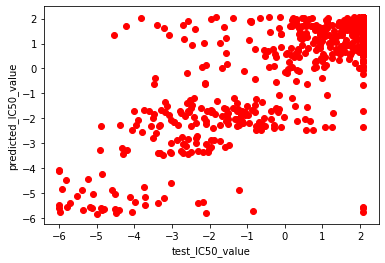

In [22]:
plt.scatter(test_label_array,predicted_value,c='red')
plt.xlabel('test_IC50_value')
plt.ylabel('predicted_IC50_value')
plt.savefig(workdir + '//190517_randomforest_w_ccle_gdsc_mut_drug.png')

In [23]:
rse = ((b[0]-a[0])**2).sum()
mse = rse / len(b)
print("Final rmse value is =",np.sqrt(mse))

Final rmse value is = 1.2397889479495028


In [ ]:
# R-squared value

from sklearn.metrics import r2_score
r2_value = r2_score(b, a) 
print(r2_value)